In [1]:
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import calculations, data_loader, dict_tools, frame_filters

# Load data by year
YEARS = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
DATA = data_loader.join_datasets_year('data', YEARS)

# Columns that we want to retrieve
COLUMNS = ['short_name', 'year', 'age', 'overall', 'potential']

In [2]:
# Male players BMI per country at 2022
COLUMNS = ['age', 'club_flag_url']
df_bmi = calculations.calculate_bmi(DATA, 'M', 2022, COLUMNS)
max_bmi = calculations.calculate_nationality(df_bmi).groupby('nationality', as_index=False )['BMI'].max()
print(max_bmi)

   nationality        BMI
0           ae  25.762981
1           ar  28.405338
2           at  25.451114
3           au  27.636054
4           be  27.143037
5           bo  28.068918
6           br  28.395062
7           ca  26.775510
8           ch  27.173119
9           cl  25.712199
10          cn  27.160494
11          co  25.951557
12          cy  24.302487
13          cz  25.712199
14          de  27.769798
15          dk  28.042817
16          ec  28.719723
17          es  27.379665
18          fi  26.874496
19          fr  27.166448
20      gb-eng  34.717839
21      gb-sct  27.471707
22      gb-wls  26.196187
23          gr  25.970116
24          hr  25.680074
25          hu  25.335002
26          ie  27.146814
27          in  27.414454
28          it  27.450605
29          jp  26.794938
30          kr  25.978680
31          mx  29.761905
32         nan  27.143037
33          nl  27.452887
34          no  26.296567
35          nz  25.746944
36          pe  26.880952
37          

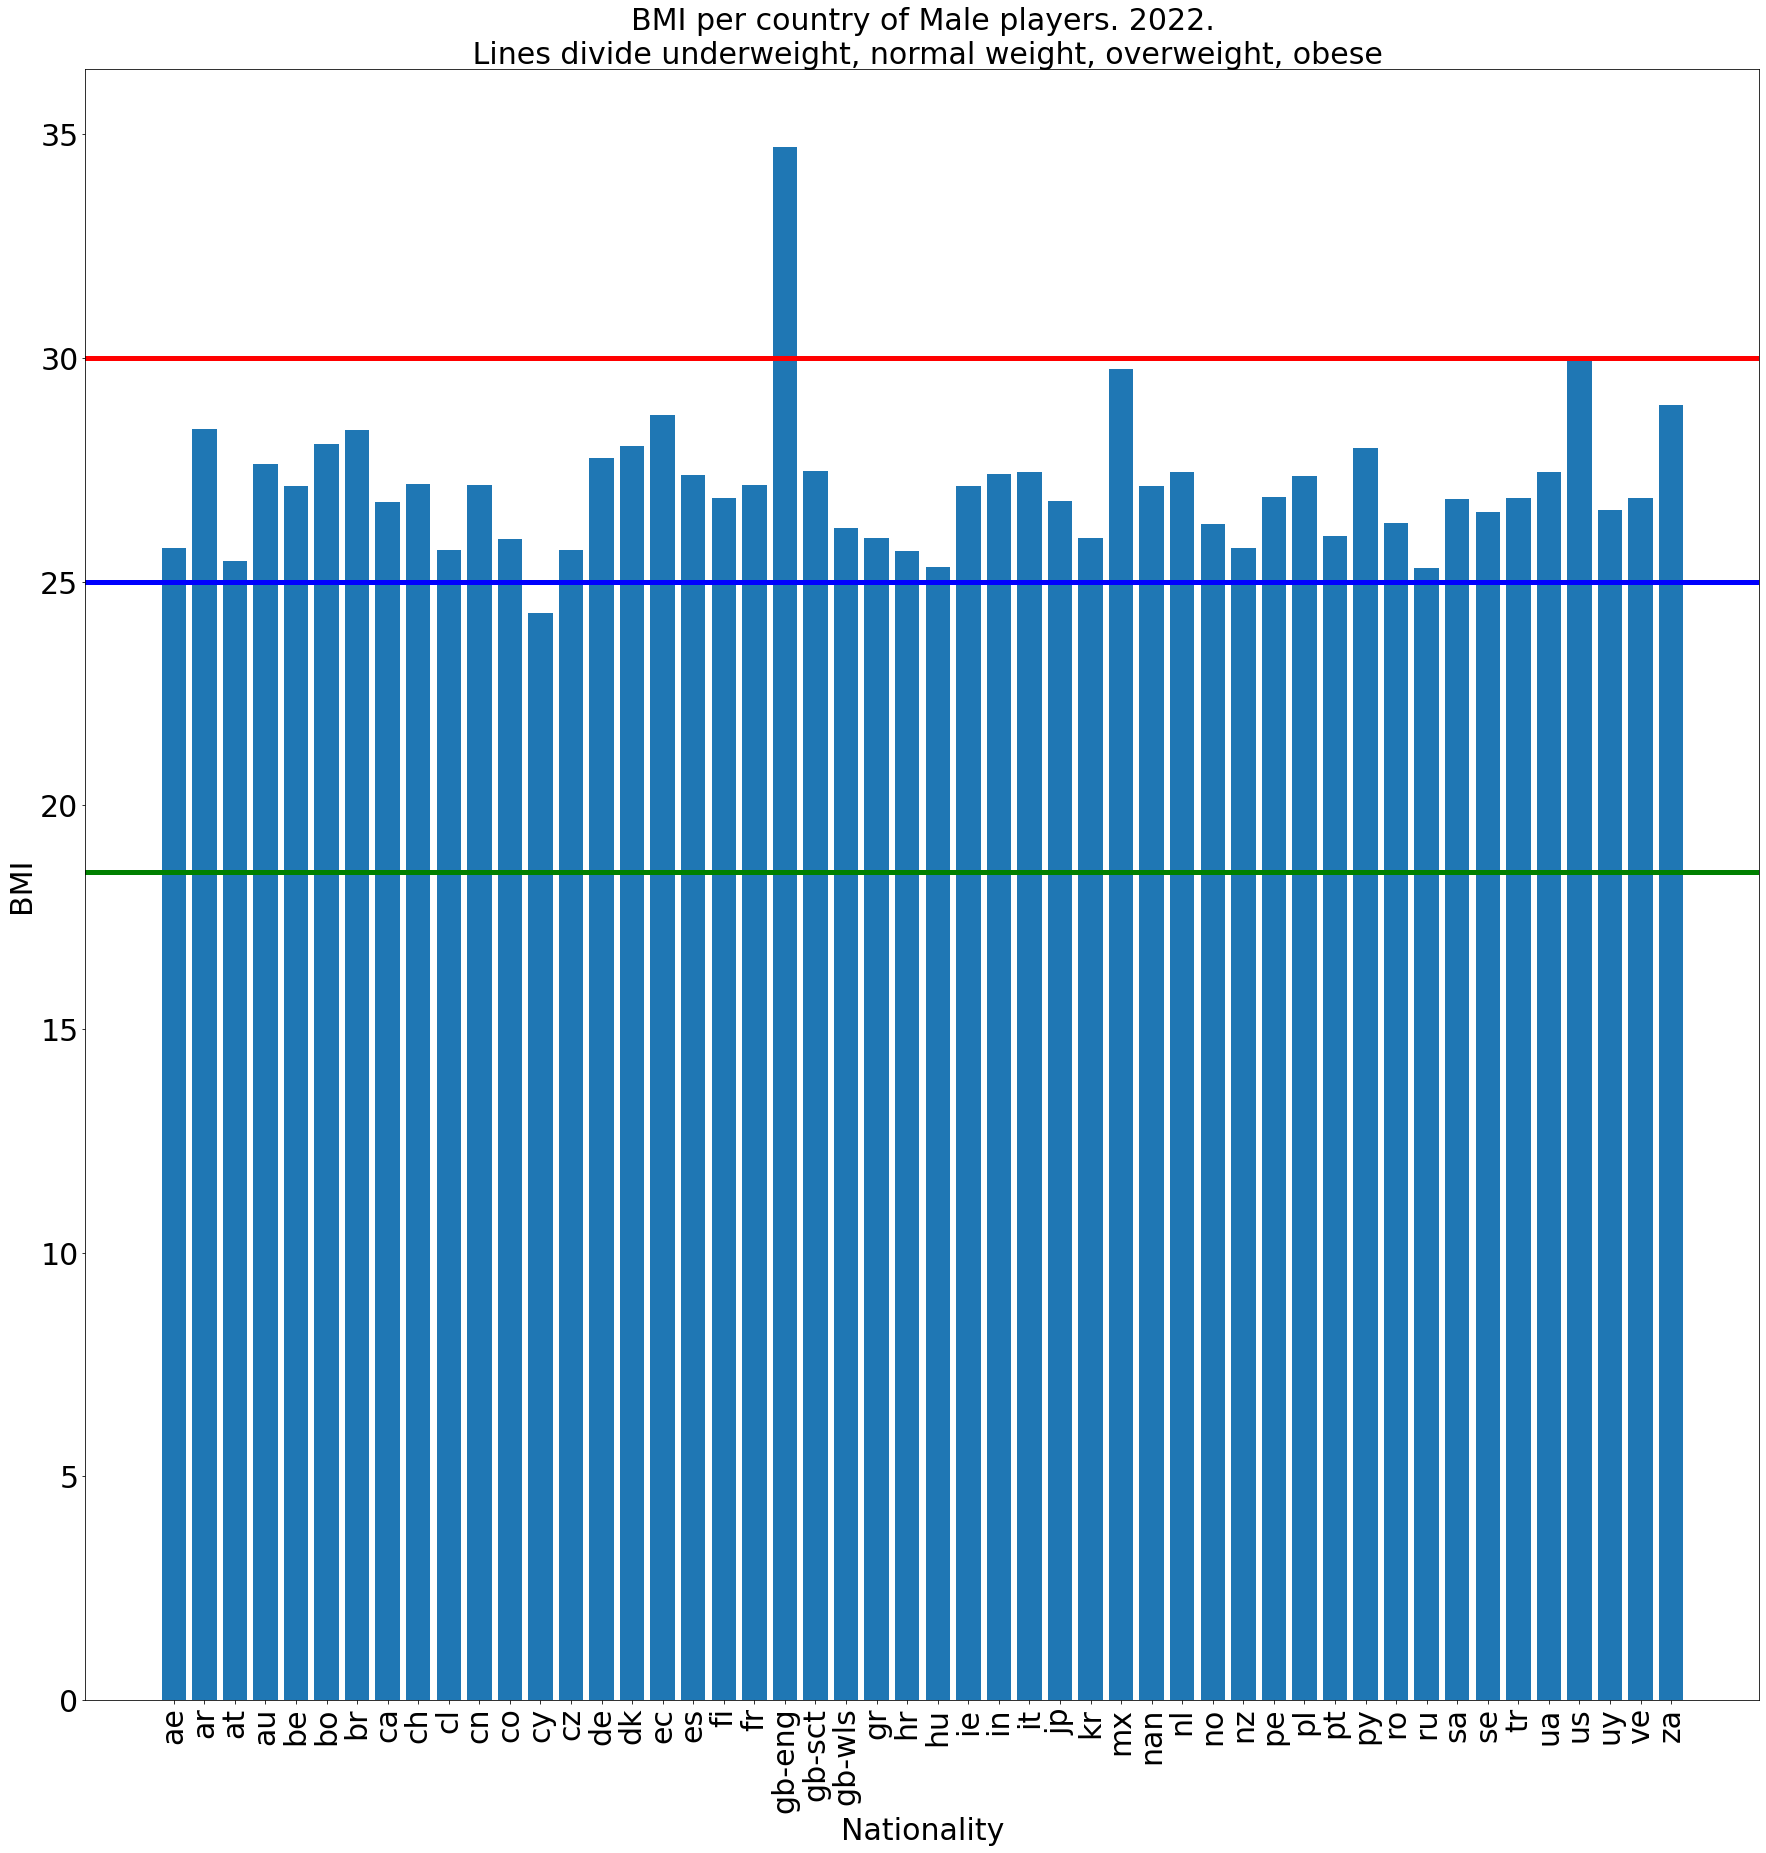

Els resultats són curiosos, hem agafat el màxim de BMI i pràcticament totes les nacionalitats 
 
tenen jugadors amb sobrepès. Dit això és normal que si agafem els valors màxim surtin jugadors pesats, 

que potser no són els més atlètics, i el futbol també és un joc de contacte, 

tenir un BMI per sobre la resta pot ser favorable en certes situacions.


In [24]:
x_values = max_bmi['nationality'].tolist()
y_values = max_bmi['BMI'].tolist()

x_pos = np.arange(len(x_values))

plt.bar(x_pos, y_values)

plt.xticks(x_pos, x_values, rotation=90, fontsize=30)

plt.yticks(fontsize=30)

plt.axhline(y=18.5, color='g', linestyle='-', linewidth=5)

plt.axhline(y=25, color='b', linestyle='-', linewidth=5)

plt.axhline(y=30, color='r', linestyle='-', linewidth=5)

plt.rcParams["figure.figsize"] = (30,30)
plt.title("""BMI per país de jugadors masculins al 2022.\n 
Les línies divideixen baix pes, pes normal, sobrepes i obès""", fontsize=30)
plt.ylabel('BMI', fontsize=30)
plt.xlabel('Nacionalitat', fontsize=30)
plt.show()

print("""Els resultats són curiosos, hem agafat el màxim de BMI i pràcticament totes\n
les nacionalitats tenen jugadors amb sobrepès. Dit això és normal que si agafem els \n
valors màxim surtin jugadors pesats, que potser no són els més atlètics, i el futbol\n
també és un joc de contacte, tenir un BMI per sobre la resta pot ser favorable en certes\n
situacions.""")

In [33]:
from itertools import chain

val = ['CAM, LM', 'CAM, LM', 'CAM, CM, LM', 'CAM, CM', 'CAM, CM', 'CAM, CM', 'CAM, CM']

val_list = [x.split(', ') for x in val]
val_list = list(set(chain.from_iterable(val_list)))
print(val_list)

['CM', 'LM', 'CAM']




Top 4 futbolistes amb la millor mitjana de velocitat en sprint:

[('Maicon', 95.0, {'value': [95, 95], 'year': [2016, 2019]}),
 ('E. Asante',
  94.75,
  {'value': [95, 95, 95, 94], 'year': [2016, 2017, 2018, 2020]}),
 ('P. Aubameyang',
  94.57142857142857,
  {'value': [95, 96, 96, 95, 95, 94, 91],
   'year': [2016, 2017, 2018, 2019, 2020, 2021, 2022]}),
 ('M. Bolly',
  94.5,
  {'value': [96, 96, 95, 94, 93, 93],
   'year': [2016, 2017, 2018, 2020, 2021, 2022]})]


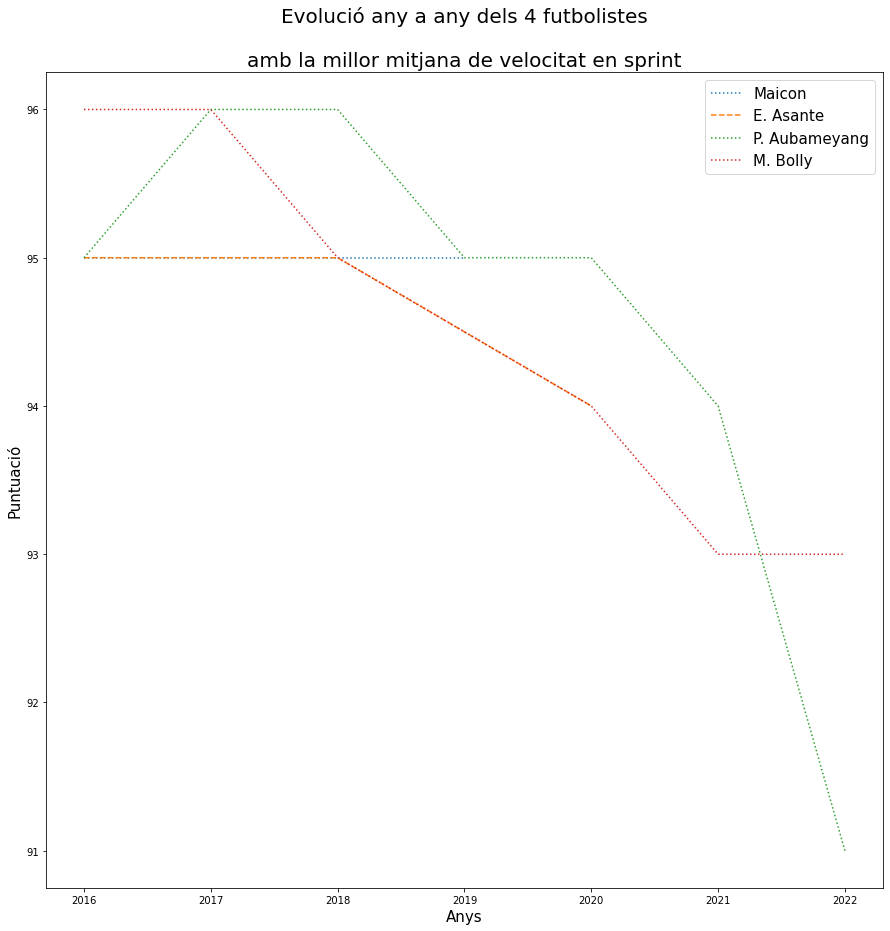

In [50]:
# Load data by year
YEARS = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
DATA_E5 = data_loader.join_datasets_year('data', YEARS)
column_list = ["short_name", "movement_sprint_speed", "year"]
id_list = DATA_E5['sofifa_id'].tolist()

dict_e5 = dict_tools.players_dict(DATA_E5, id_list, column_list)

query = [("short_name", "one")]

dict_e5_clean = dict_tools.clean_up_players_dict(dict_e5, query)

top_average_sprint_speedsters = evolucio.top_average_column(dict_e5,
                                                            'short_name', 
                                                            'movement_sprint_speed', 2)

print("\n\nTop 4 futbolistes amb la millor mitjana de velocitat en sprint:\n")
pprint.pprint(top_average_sprint_speedsters[:4])

years_1 = top_average_sprint_speedsters[0][2]['year']
years_2 = top_average_sprint_speedsters[1][2]['year']
years_3 = top_average_sprint_speedsters[2][2]['year']
years_4 = top_average_sprint_speedsters[3][2]['year']

value_1 = top_average_sprint_speedsters[0][2]['value']
value_2 = top_average_sprint_speedsters[1][2]['value']
value_3 = top_average_sprint_speedsters[2][2]['value']
value_4 = top_average_sprint_speedsters[3][2]['value']

label_1 = top_average_sprint_speedsters[0][0]
label_2 = top_average_sprint_speedsters[1][0]
label_3 = top_average_sprint_speedsters[2][0]
label_4 = top_average_sprint_speedsters[3][0]

plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
ax.plot(years_1, value_1, label=label_1, ls=':')
ax.plot(years_2, value_2, label=label_2, ls='--')
ax.plot(years_3, value_3, label=label_3, ls=':')
ax.plot(years_4, value_4, label=label_4, ls=':')
ax.legend(fontsize=15)
plt.title("""Evolució any a any dels 4 futbolistes\n 
amb la millor mitjana de velocitat en sprint""", fontsize=20)
plt.ylabel('Puntuació', fontsize=15)
plt.xlabel('Anys', fontsize=15)
plt.show()